# Preprocessing

Juan Navarro, <jsnavarroa@unal.edu.co>

-------------------------------


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
data_path = os.path.abspath("./data")

## Preprocessing

(507,)
(507, 1)
(507, 1)


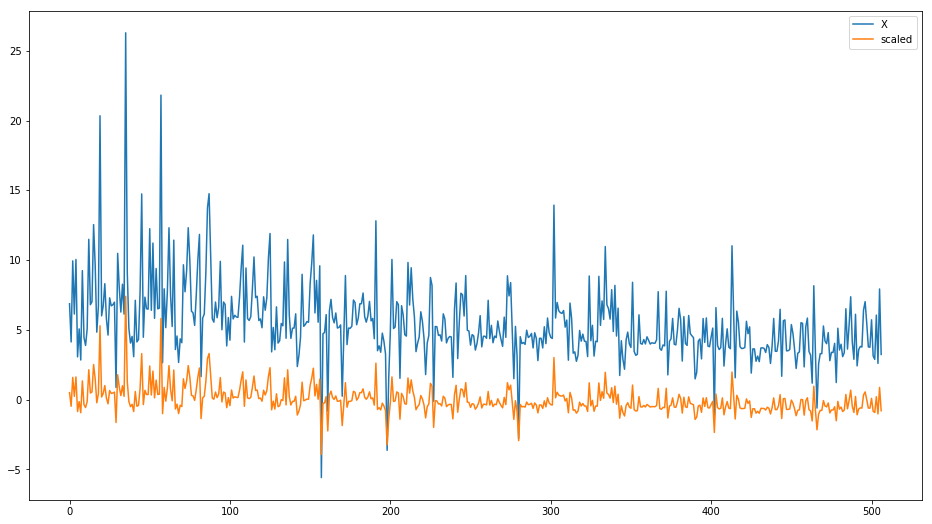

,Fecha corte,Núm. unidades,Valor unidad para las operaciones del día t,Valor fondo al cierre del día t,Núm. Invers.,Rentab. dia
count,507,5.070000e+02,507.000000,5.070000e+02,507.000000,5.070000e+02
unique,507,NaN,NaN,NaN,NaN,NaN
top,2017-10-30 00:00:00,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
first,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2018-12-05 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.351207e+08,27357.720434,1.191537e+13,446987.717949,-2.242344e-16
std,NaN,1.646051e+07,562.400271,6.651633e+11,33283.292361,1.000988e+00
min,NaN,3.917564e+08,26241.430000,1.028025e+13,392772.000000,-3.932020e+00
25%,NaN,4.214055e+08,26931.295000,1.137990e+13,416512.500000,-5.526319e-01


In [10]:
import pandas as pd
from sklearn import preprocessing

report = pd.read_csv(data_path+"/profitability.csv")

report = report.drop_duplicates()

# Select only FIDUCUENTA
report = report[report['Nombre Negocio'].str.contains("FIDUCUENTA")]

# Drop columns with one value
report = report. drop(columns=['Tipo Entidad', 'Cód. Entidad', 'Nombre Entidad', 'Cód. Negocio', 
                              'Nombre Negocio', 'Subtipo Negocio', 'Subtipo Negocio', 
                              'Tipo Part. <sup>1<sup/>', 'Cons. id Part.', 'Principal / Compart.'], errors='ignore')

# Drop unused columns
report = report. drop(columns=['Rentab. mes', 'Rentab. sem', 'Rentab. año'], errors='ignore')

# Convert dates
report['Fecha corte'] = pd.to_datetime(report['Fecha corte'],infer_datetime_format=False)
report = report.sort_values(by=['Fecha corte'])
report = report.reset_index(drop=True)

# Convert to numbers
report['Rentab. dia'] = pd.to_numeric(report['Rentab. dia'])

numeric_columns = ['Núm. unidades', 'Valor unidad para las operaciones del día t', 'Valor fondo al cierre del día t']
for c in numeric_columns:
    report[c] = report[c].replace('[\$,]', '', regex=True).astype(float)

# Normalize
scaler = preprocessing.StandardScaler()
x = report['Rentab. dia'].values
print(x.shape)
x = x.reshape(-1, 1)
print(x.shape)
x_scaled = scaler.fit_transform(x)
#print(scaler.mean_)
print(x_scaled.shape)

plt.figure(figsize=(16, 9))
plt.plot(x, label='X')
plt.plot(x_scaled, label='scaled')
plt.legend()
plt.show()

report['Rentab. dia'] = pd.DataFrame(x_scaled)


# Save to file
report.to_csv(data_path+"/data.csv", index=False, encoding="utf-8")


report.describe(include="all")